<a href="https://colab.research.google.com/github/danielosullivan2007/Teaching/blob/master/Session_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [0]:
url = "https://files.digital.nhs.uk/12/2589F2/MHSDS%20Monthly_File_Nov_2018_Final.csv"
df = pd.read_csv(url)

In [0]:
df.head()
cols = list(df.columns)
metrics = cols[7:]
split = np.asarray([i.split(" - ") for i in metrics])


short = list(split[:,0])

rename_dict = dict(zip(metrics, short))
df = df.rename(columns = rename_dict)

In [0]:
df.BREAKDOWN.unique()

In [0]:
df = df[df['BREAKDOWN'] == 'Provider']

In [0]:
to_analyse = df.loc[:,['PRIMARY_LEVEL', 'PRIMARY_LEVEL_DESCRIPTION', 'MH01']]
to_analyse.MH01 = [i.replace("*","0") for i in to_analyse.MH01]
to_analyse.MH01 = pd.to_numeric(to_analyse.MH01)


In [21]:
trust_mask = to_analyse['PRIMARY_LEVEL_DESCRIPTION'].str.contains("TRUST")
council_mask = to_analyse['PRIMARY_LEVEL_DESCRIPTION'].str.contains("COUNCIL")

df_a = to_analyse[trust_mask].reset_index(drop=True)
df_b = to_analyse[council_mask].reset_index(drop=True)
df_c = to_analyse[~council_mask&~trust_mask].reset_index(drop=True)


trust_median = np.median(df_a.MH01.dropna())
council_median =  np.median(df_b.MH01.dropna())
other_median = np.median(df_c.MH01.dropna())

med = np.median(np.asarray(to_analyse.MH01.dropna()))
av = np.mean(np.asarray(to_analyse.MH01.dropna()))
med

trust_median
council_median
other_median

to_analyse.head()

,PRIMARY_LEVEL,PRIMARY_LEVEL_DESCRIPTION,MH01
197,506,DERBYSHIRE COUNTY COUNCIL,20
198,512,NOTTINGHAM CITY COUNCIL,1255
199,731,LONDON BOROUGH OF NEWHAM COUNCIL,200
200,817,WILTSHIRE COUNCIL,750
201,819,SWINDON BOROUGH COUNCIL (UNITARY),1255


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


,Type,value
0,Trusts,1550.0
1,Trusts,8690.0
2,Trusts,8925.0
3,Trusts,6435.0
4,Trusts,3565.0


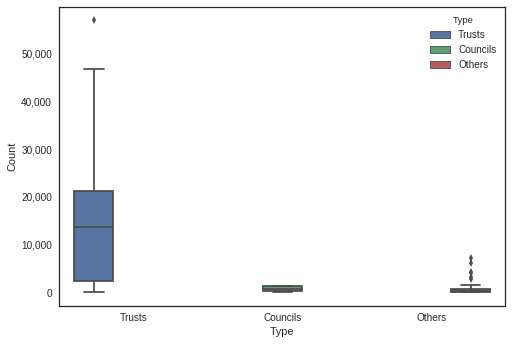

In [22]:
#fig, ax = plt.subplots()
#ax.hist(df_a.MH01, alpha = 0.5, bins = 100)
#plt.hist(df_b.MH01, alpha = 0.5, color ='r')
#plt.hist(df_c.MH01, alpha = 0.5, color ='r')

to_plot = pd.DataFrame([df_a.MH01,df_b.MH01, df_c.MH01], index=['Trusts', 'Councils', 'Others']).T
to_plot = pd.melt(to_plot)
to_plot = to_plot.rename(columns = {'variable':'Type'})
plt.style.use('seaborn-white')
import matplotlib.ticker as ticker 




ax = sns.boxplot('Type', 'value', data = to_plot, hue = 'Type')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Count')

to_plot.head()